# Clustering

El clustering o segmentación es la tarea de agrupar las muestras en base a su proximidad y componer así agrupaciones de elementos similares. Esta técnica permite por ejemplo conocer clientes que pertenecen a una agrupación y obtener el cliente tipo de dicha agrupación. También permite segregar los datos para así componer modelos específicos en cada cohorte. Es una técnica muy empleada cuando disponemos de multitud de datos y queremos estudiar si existen similitudes entre las muestras que permitan reducir el número de muestras a emplear en el estudio.

Existen multiples algoritmos aunque nosotros nos centraremos en los más populares y empleados.

https://scikit-learn.org/stable/modules/clustering.html

## Classification _vs_ Clustering

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

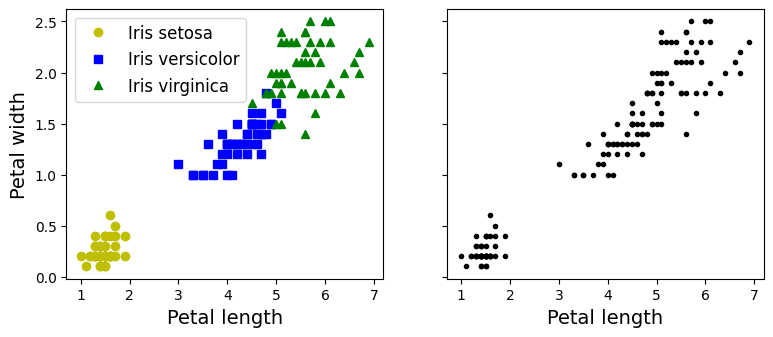

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

A simple vista podemos ver que existe dos agrupaciones claras entre las muestras.

### K-means (k-medios)

El algoritmo k-medios es un método de agrupamiento no supervisado que se utiliza para dividir un conjunto de datos en k grupos o clusters, donde cada grupo se caracteriza por tener características similares. El objetivo es minimizar la suma de las distancias entre cada objeto y el centroide de su grupo o cluster.

El algoritmo k-medios funciona de la siguiente manera:

* Inicialización: Se escogen k centroides aleatoriamente en el espacio de los datos.
* Asignación de objetos a los centroides: cada objeto se asigna al centroide más cercano.
* Actualización de centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a ese grupo.
* Repetición: se repiten los pasos 2 y 3 hasta que los centroides no se mueven o se mueven por debajo de una distancia umbral en cada paso.

In [3]:
from sklearn.cluster import KMeans

k = 2

kmeans = KMeans(n_clusters=k, random_state=101)
y_pred = kmeans.fit_predict(X)

In [4]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
import numpy as np

mapping = np.array([1,0,2])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

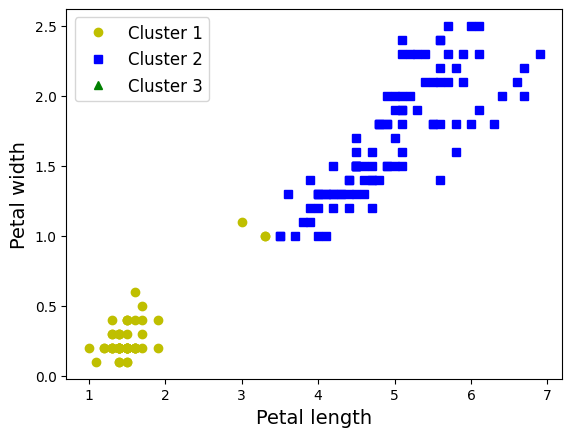

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [8]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=101)
y_pred = kmeans.fit_predict(X)

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

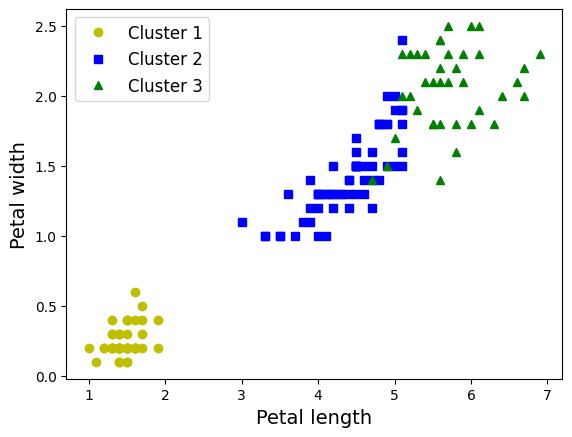

In [12]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0, 47, 14],
       [ 0,  3, 36]])

In [14]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

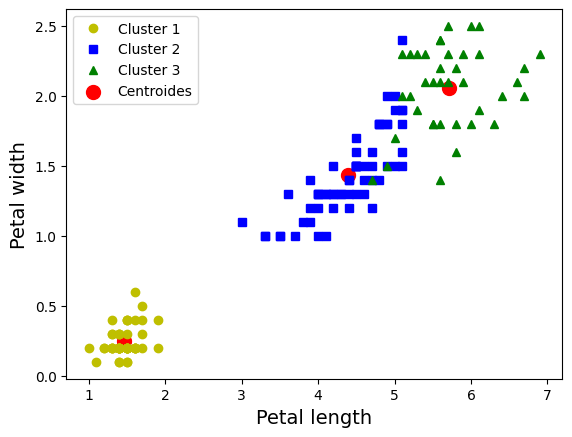

In [15]:
#Visualising the clusters
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroides')

plt.legend()

Nuestro modelo mantiene las etiquetas asignadas a cada cluster.

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Pero podemos emplear este modelo para predecir en qué grupo caería una nueva muestra.

In [17]:
X_new = np.array([[0, 2, 3, 2], [-3, 3, -3, 2.5], [-1, 2, -2.5, 1.5]])
kmeans.predict(X_new)

array([1, 1, 1], dtype=int32)

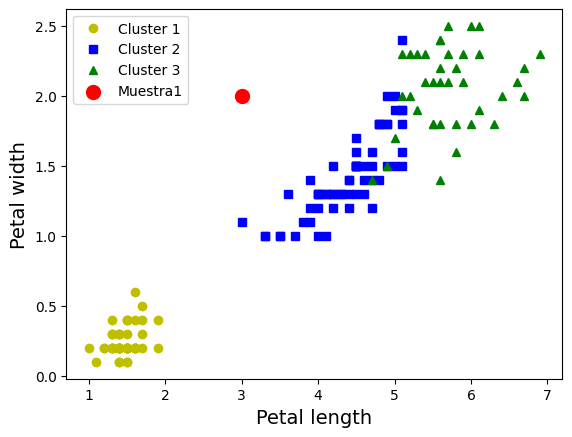

In [18]:
#Visualising the clusters
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

#Plotting the centroids of the clusters
sample = [0, 2, 3, 2]
plt.scatter(sample[2], sample[3], s = 100, c = 'red', label = 'Muestra1')

plt.legend()

### Hard Clustering _vs_ Soft Clustering

Encontrar el centroide más cercano a una muestra dada, se conoce como _hard clustering_. Si medimos las distancias a todos los centroides mediante la función `transform` veremos que a veces es fina la línea que separa la asignación a una categoría u otra. Si asignamos la probabilidad de pertenencia a cada cluster estaremos realizando un _soft clustering_.

In [19]:
X_new

array([[ 0. ,  2. ,  3. ,  2. ],
       [-3. ,  3. , -3. ,  2.5],
       [-1. ,  2. , -2.5,  1.5]])

In [20]:
kmeans.predict(X_new)

array([1, 1, 1], dtype=int32)

In [21]:
kmeans.transform(X_new)**2

array([[ 55.51118343,  32.54118   ,  37.41375705],
       [173.26118343,  89.26918   , 134.71129804],
       [130.64195266,  55.38118   ,  95.38916689]])

In [22]:
# squared distance to cluster center
X_dist = kmeans.transform(X_new)**2

X_sum = X_dist.sum(axis=1).round(2)

X_norm = np.divide(X_dist.T, X_sum).T

X_norm

array([[0.44242595, 0.25935427, 0.29818887],
       [0.43616248, 0.22472354, 0.33911816],
       [0.46424062, 0.19679891, 0.33896865]])

In [23]:
import pandas as pd

# do something useful...
df = pd.DataFrame(X_norm, columns=['L1', 'L0', 'L2'])
df.head()

,L1,L0,L2
0,0.442426,0.259354,0.298189
1,0.436162,0.224724,0.339118
2,0.464241,0.196799,0.338969


De hecho, uno de los valores clave a la hora de evaluar la bondad de un modelo de clustering es la _inertia_. La inercia ($J$) mide la suma de los cuadrados de la distancia a los centrodies de los clústeres ($\mu_k$) tal que:

$$

J = \sum_{k}^{K} \sum_{i}^{n_k} \| x_i - \mu_{k} \|^2

$$

In [24]:
kmeans.inertia_

78.8556658259773

### K-Means++

En lugar de inicializar los centroides de forma totalmente aleatoria, es preferible inicializarlos utilizando el siguiente algoritmo, propuesto en un [documento de 2006](https://goo.gl/eNUPw6) por David Arthur y Sergei Vassilvitskii:
* Tomar un centroide $c_1$, elegido uniformemente al azar del conjunto de datos.
* Tomar un nuevo centroide $c_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercano ya elegido. Esta distribución de probabilidad asegura que las instancias que están más lejos de los centroides ya elegidos tienen muchas más probabilidades de ser seleccionadas como centroides.
* Repita el paso anterior hasta que se hayan elegido todos los $k$ centroides.

El resto del algoritmo K-Means++ es K-Means normal. Con esta inicialización, es mucho menos probable que el algoritmo K-Means converja a una solución subóptima, por lo que es posible reducir `n_init` considerablemente. La mayoría de las veces, esto compensa en gran medida la complejidad adicional del proceso de inicialización.

Para establecer la inicialización a K-Means++, simplemente establezca `init="k-means++"` (de hecho, este es el valor predeterminado). Para estos ejemplos crearemos datos algo más complejos que los del iris.

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(2500, n_features=2, centers=5, random_state=42)

In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

4820.330867523524

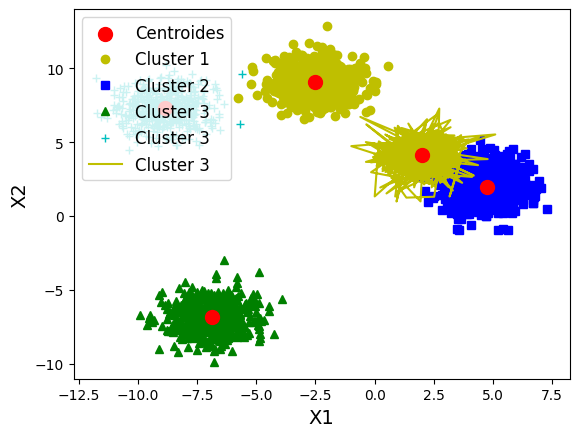

In [27]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)
plt.plot(X[y==3, 0], X[y==3, 1], "c+", label="Cluster 4", zorder=-1)
plt.plot(X[y==4, 0], X[y==4, 1], "y-", label="Cluster 5", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

### K-Means acelerado

El algoritmo K-Means puede acelerarse significativamente evitando muchos cálculos de distancia innecesarios: esto se consigue explotando la desigualdad del triángulo (dados tres puntos A, B y C, la distancia AC es siempre tal que AC ≤ AB + BC) y llevando un registro de los límites inferior y superior de las distancias entre instancias y centroides (para más detalles, véase este [artículo de 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) de Charles Elkan).

Para utilizar la variante de Elkan de K-Means, basta con establecer `algorithm="elkan"`.

In [28]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

8.73 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means

Scikit-Learn también implementa una variante del algoritmo K-Means que admite minilotes (véase [este documento](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [29]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=10)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=10, n_clusters=5, random_state=42)

In [30]:
minibatch_kmeans.inertia_

7527.120413227202

Mini-batch K-Means es mucho más rápido y suele ofrecer una mejor generalización que K-Means normal:

In [31]:
%timeit KMeans(n_clusters=5).fit(X)

3.81 ms ± 861 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit MiniBatchKMeans(n_clusters=5, batch_size=10).fit(X)

24.1 ms ± 7.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Habitualmente el MiniBatch suele ser más rápido, sin embargo, su rendimiento suele ser inferior (mayor inercia), y sigue degradándose a medida que _k_ aumenta. Tracemos la relación de inercia y la relación de tiempo de entrenamiento entre Mini-batch K-Means y K-Means normal:

In [33]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=20)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

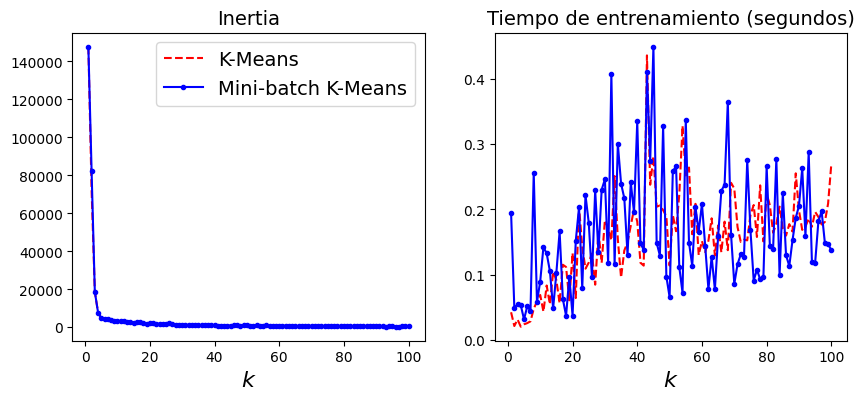

In [34]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Tiempo de entrenamiento (segundos)", fontsize=14)

plt.show()

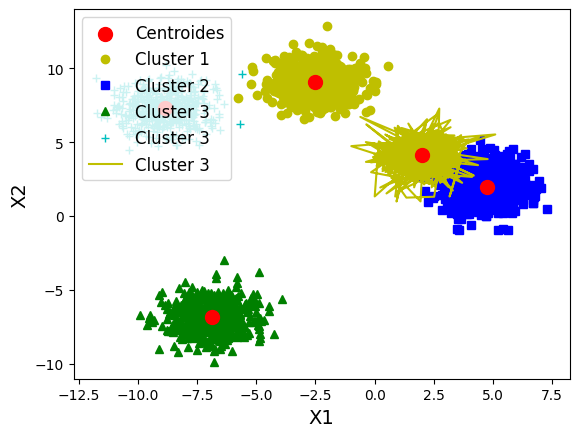

In [35]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)
plt.plot(X[y==3, 0], X[y==3, 1], "c+", label="Cluster 4", zorder=-1)
plt.plot(X[y==4, 0], X[y==4, 1], "y-", label="Cluster 5", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

### Buscando el número óptimo de _k_

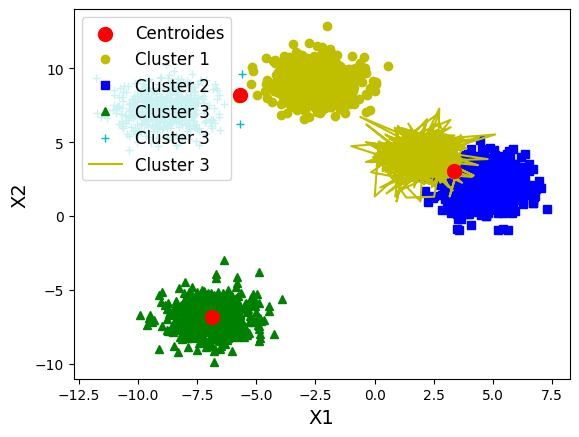

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)
plt.plot(X[y==3, 0], X[y==3, 1], "c+", label="Cluster 3", zorder=-1)
plt.plot(X[y==4, 0], X[y==4, 1], "y-", label="Cluster 3", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

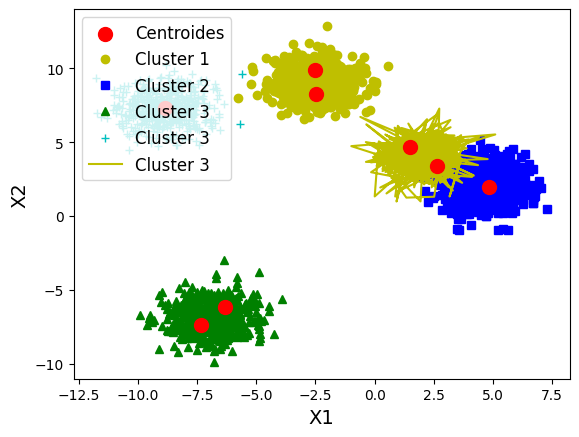

In [37]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)
plt.plot(X[y==3, 0], X[y==3, 1], "c+", label="Cluster 3", zorder=-1)
plt.plot(X[y==4, 0], X[y==4, 1], "y-", label="Cluster 3", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

Uy, no pinta bien. ¿Qué inercia presentan?

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

kmeans.inertia_

18706.68502454899

In [39]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

kmeans.inertia_

3825.6974219395497

No, no podemos tomar simplemente el valor de $k$ que minimiza la inercia, ya que ésta sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos más conglomerados haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Sin embargo, podemos representar la inercia en función de $k$ y analizar la curva resultante:

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [41]:
import pandas as pd

df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

,inertia,inertia_1,diff%
0,147755.053920,NaN,NaN
1,72332.506492,147755.053920,0.489543
2,18706.685025,72332.506492,0.258621
3,7819.895569,18706.685025,0.418027
4,4820.330868,7819.895569,0.616419
5,4481.827383,4820.330868,0.929776
6,4159.701449,4481.827383,0.928126
7,3825.697422,4159.701449,0.919705
8,3511.937543,3825.697422,0.917986


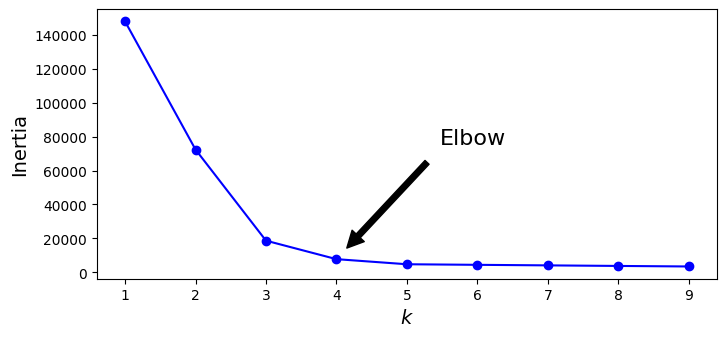

In [42]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

Como se puede ver, 4 o 5 parece el número correcto de clusteres en nuestra muestra. Es donde parece no obtenemos una mejora significativa en el valor de inercia.

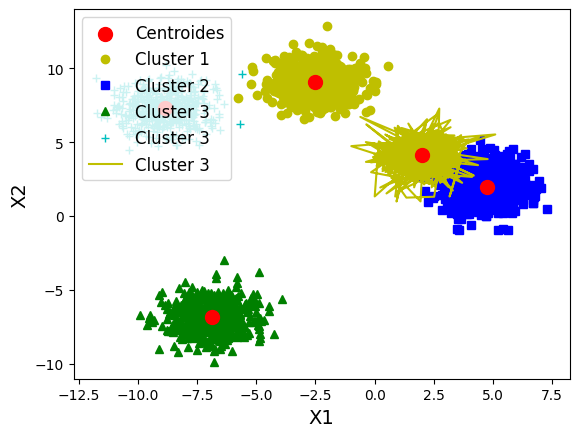

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)
plt.plot(X[y==3, 0], X[y==3, 1], "c+", label="Cluster 3", zorder=-1)
plt.plot(X[y==4, 0], X[y==4, 1], "y-", label="Cluster 3", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

Otro enfoque consiste en observar la _puntuación de silueta_, que es el _coeficiente de silueta_ medio de todas las instancias. El coeficiente de silueta de una instancia es igual a $(b - a)/\max(a, b)$ donde $a$ es la distancia media a las otras instancias del mismo cluster (es la _distancia media intra-cluster_), y $b$ es la _distancia media al cluster más cercano_, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza $b$, excluyendo el propio cluster de la instancia). El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otros clusters, mientras que un coeficiente cercano a 0 significa que está cerca del límite de un cluster, y finalmente un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al cluster equivocado.

Vamos a trazar la puntuación de la silueta en función de $k$:

In [44]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.670698455344186

In [45]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

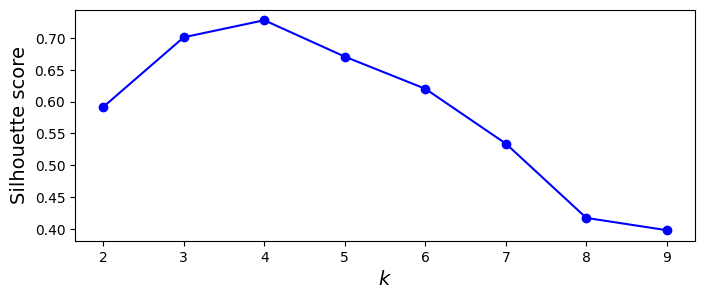

In [46]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Como puede ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que $k=4$ es una muy buena elección, también subraya el hecho de que $k={3,5}$ son buenas aproximaciones también.

El coeficiente de silueta de cada instancia, ordenado por el cluster al que está asignado y por el valor del coeficiente, ofrece una visualización aún más informativa. Esto se denomina _diagrama de siluetas_.

El análisis de siluetas puede utilizarse para estudiar la distancia de separación entre los conglomerados resultantes. El gráfico de siluetas muestra una medida de la proximidad entre cada punto de un conglomerado y los puntos de los conglomerados vecinos, lo que permite evaluar visualmente parámetros como el número de conglomerados. Esta medida tiene un rango de [-1, 1].

Los coeficientes de silueta (como se denominan estos valores) cercanos a +1 indican que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos conglomerados vecinos y los valores negativos indican que esas muestras podrían haber sido asignadas al conglomerado equivocado.

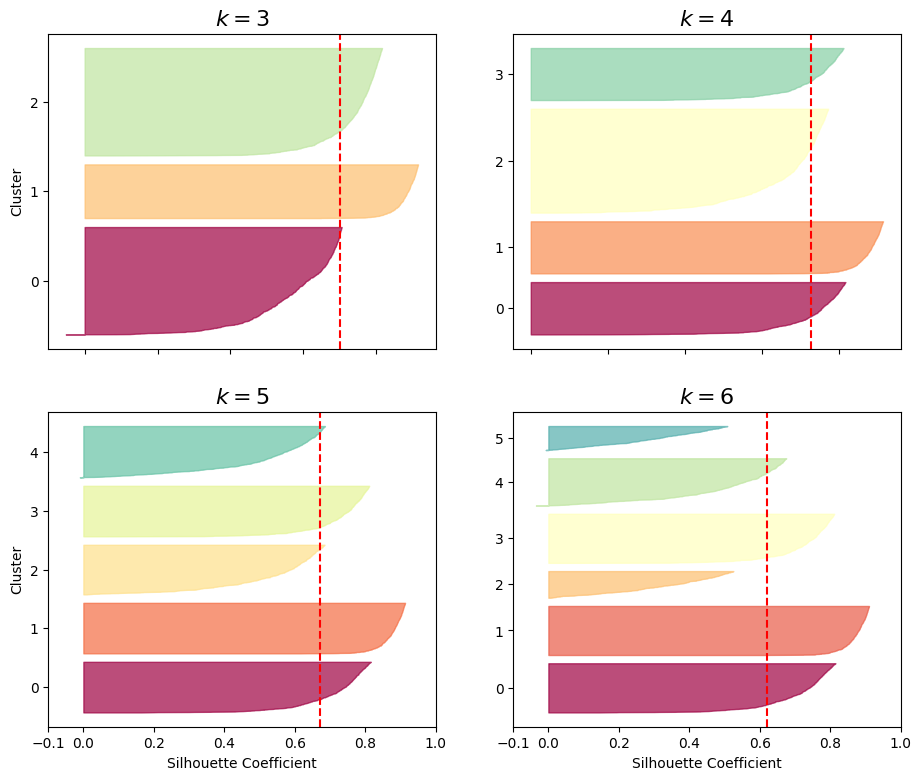

In [47]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## DBSCAN

Existen casos donde el clustering por proximidad puede arrojar ciertos problemas. El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) se basa en esta noción intuitiva de clústeres y ruido. La idea clave es que, para cada punto de un clúster, la vecindad de un radio dado tiene que contener al menos un número mínimo de puntos.

In [48]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

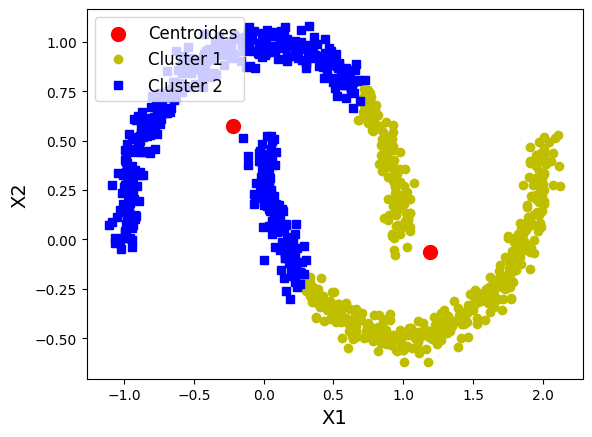

In [49]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Cluster 2", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)

dbscan2 = DBSCAN(eps=0.02, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.02)

In [51]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

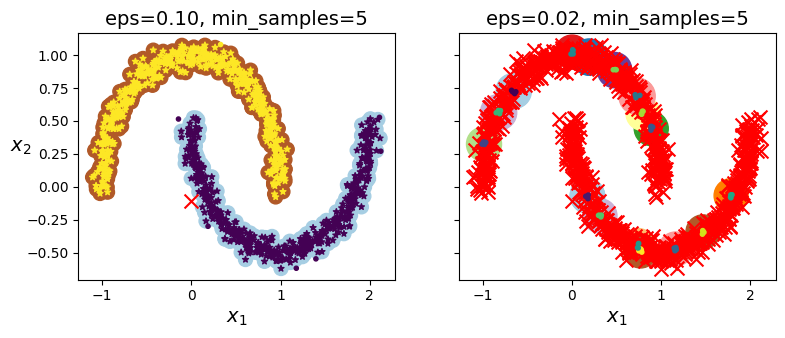

In [52]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


In [53]:
labels = dbscan2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 16
Estimated number of noise points: 908


In [54]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


In [55]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)

Homogeneity: 1.000
Completeness: 0.990
V-measure: 0.995
Adjusted Rand Index: 0.998
Adjusted Mutual Information: 0.995


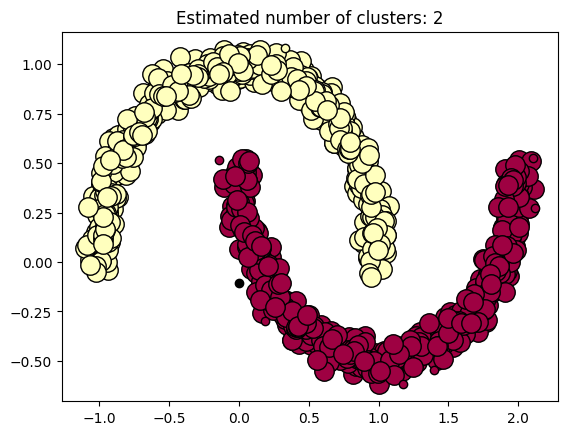

In [56]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [58]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [59]:
knn.predict_proba(X_new)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

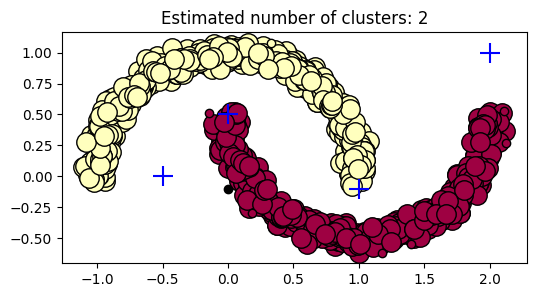

In [60]:
plt.figure(figsize=(6, 3))
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### Spectral Clustering

In [61]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [62]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [63]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [64]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

/tmp/ipykernel_19900/2175278809.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


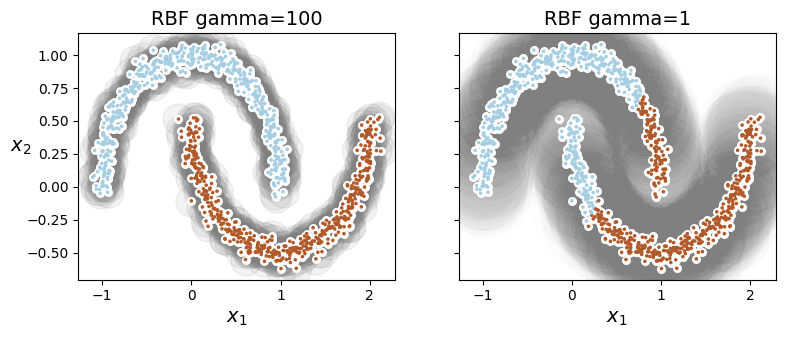

In [65]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


¿Cual usamos? Debemos basarnos mucho en las métricas de dispersión para conocer cómo de bien o mal estamos ajustando nuestro modelo.

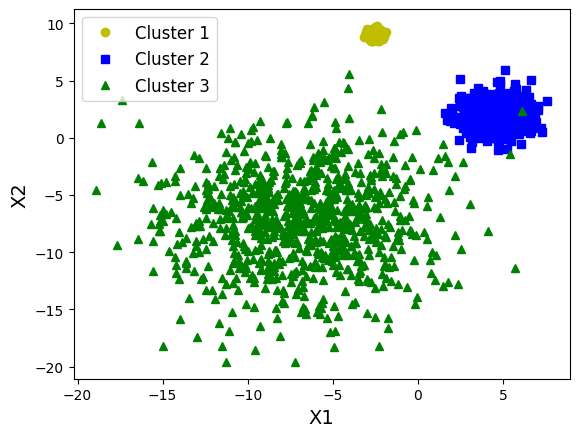

In [89]:
X, y = make_blobs(2500, n_features=2, centers=3, cluster_std = [0.2, 1.0, 4.0], random_state=42)

#Visualising the clusters
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Cluster 3", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);

In [90]:
dbscan = DBSCAN(eps=0.07, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.07)

In [91]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 1601


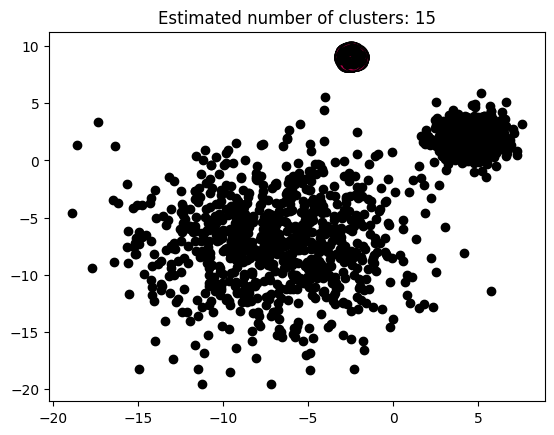

In [92]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

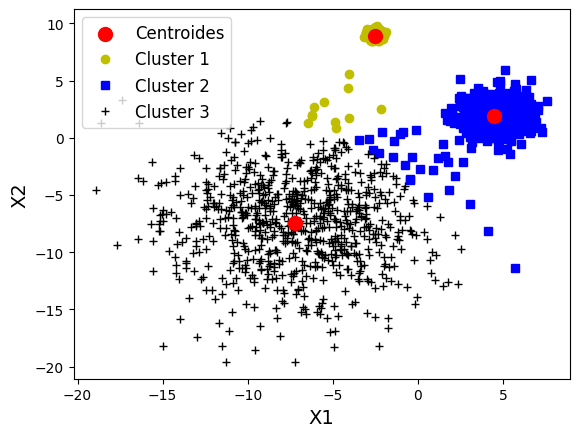

In [96]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroides', zorder=1)

#Visualising the clusters
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Cluster 1", zorder=-1)
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Cluster 2", zorder=-1)
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "k+", label="Cluster 3", zorder=-1)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=12);